In [25]:
import pandas as pd
import numpy as np

from sklearn import model_selection
from sklearn import  metrics
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt

# Zadanie
Proszę pobrać dane z

http://archive.ics.uci.edu/ml/datasets/Auto+MPG

http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data

In [2]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]

In [3]:
data = pd.read_csv(url, names=names, delimiter="\s+", na_values=["?"])
print(data.shape)

(398, 9)


In [4]:
data.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   model year  origin                   car name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino

# Zadanie
Proszę usunąć kolumny, które nie są numeyczne.

In [5]:
drop_list = ['car name']

In [6]:
data=data.drop(drop_list, axis=1)
data.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   model year  origin  
0          70       1  
1          70       1  
2          70       1  
3          70       1  
4          70       1

# Zadanie
Prosze usunąć brakujące dane.

In [7]:
null_counts = data.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64


In [8]:
data=data.dropna()
data.head()
# displacement - pojemnoś

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   model year  origin  
0          70       1  
1          70       1  
2          70       1  
3          70       1  
4          70       1

In [21]:
data.columns  = [i.replace(" ","_") for i in data.columns.values  ]

data.head(10)

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   
5  15.0          8         429.0       198.0  4341.0          10.0   
6  14.0          8         454.0       220.0  4354.0           9.0   
7  14.0          8         440.0       215.0  4312.0           8.5   
8  14.0          8         455.0       225.0  4425.0          10.0   
9  15.0          8         390.0       190.0  3850.0           8.5   

   model_year  origin  
0          70       1  
1          70       1  
2          70       1  
3          70       1  
4          70       1  
5          70       1  
6          70       1  
7          70       1  
8          70       1  
9          70       1

In [34]:
# model = ols("acceleration ~ displacement + model_year:origin", data).fit()
# model = ols("acceleration ~ mpg + displacement + cylinders + horsepower + weight + model_year", data).fit()
model = ols("acceleration ~ displacement+np.log(horsepower)+np.log(weight)+(weight:horsepower)", data).fit()
# Print the summary
print((model.summary2()))

# dążymy do wyniku:
# R2 jak najbliżej 1
# AIC, BIC przed odbiciem
# Durbin - Watson nie patrzymy ale formalnie większe niż 1
# Condition no. nie patrzymy ale formalnie mniej niż 30

# próbujemy przewidzieć wartość przyspieszenia - acceleration

                   Results: Ordinary least squares
Model:                OLS               Adj. R-squared:      0.697    
Dependent Variable:   acceleration      AIC:                 1445.5344
Date:                 2019-02-02 10:06  BIC:                 1465.3907
No. Observations:     392               Log-Likelihood:      -717.77  
Df Model:             4                 F-statistic:         225.4    
Df Residuals:         387               Prob (F-statistic):  1.12e-99 
R-squared:            0.700             Scale:               2.3095   
----------------------------------------------------------------------
                    Coef.   Std.Err.    t     P>|t|   [0.025   0.975] 
----------------------------------------------------------------------
Intercept          -15.5410   5.8414  -2.6605 0.0081 -27.0258  -4.0562
displacement        -0.0139   0.0023  -5.9549 0.0000  -0.0185  -0.0093
np.log(horsepower) -11.8513   0.6863 -17.2695 0.0000 -13.2006 -10.5021
np.log(weight)      10.923

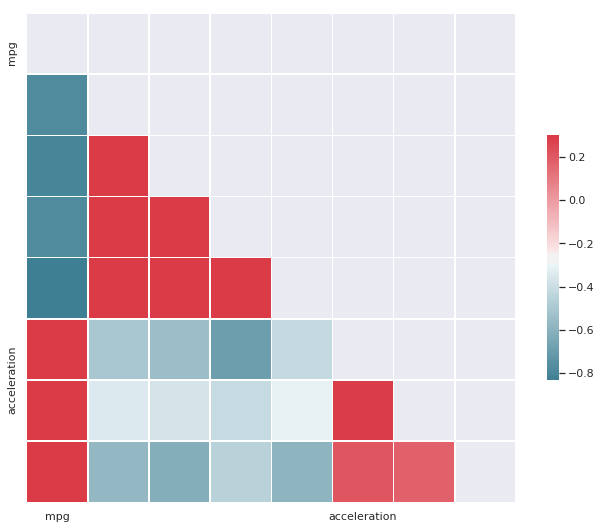

In [26]:
sns.set(style="darkgrid")

corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()

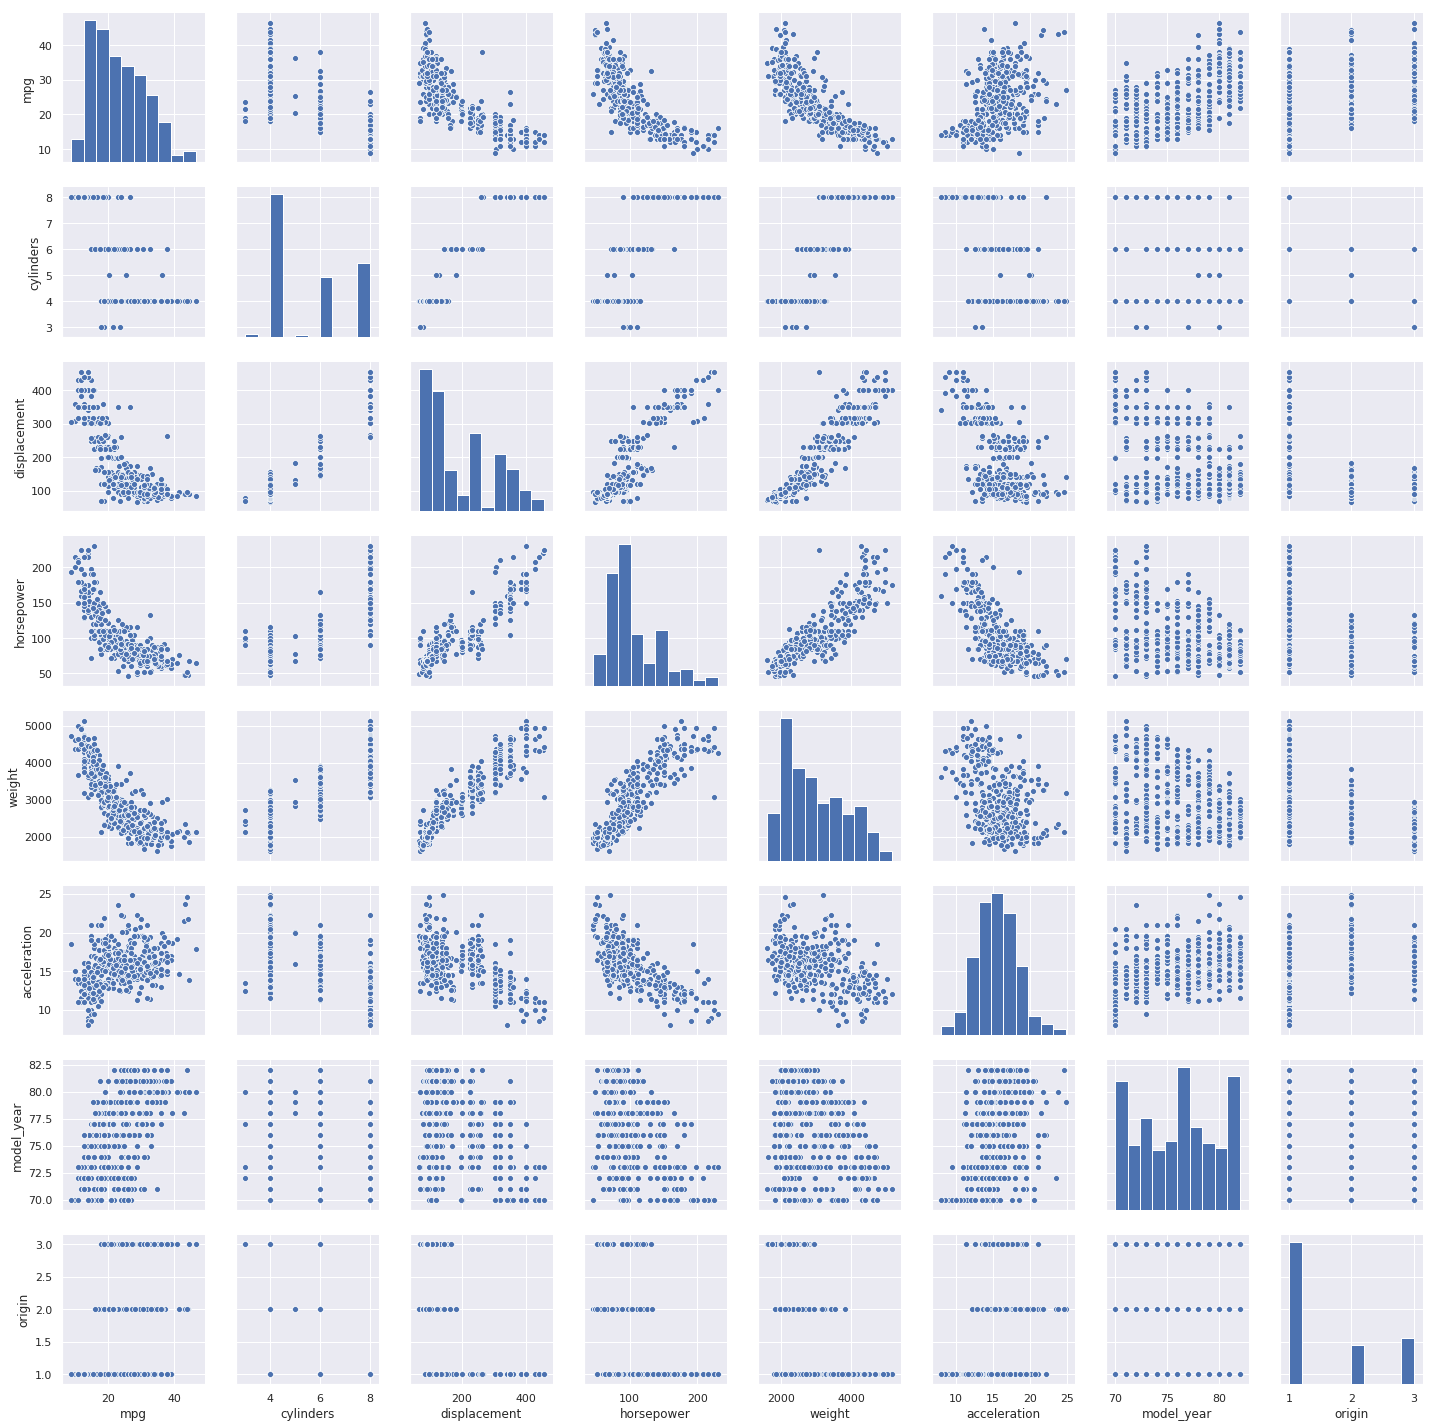

In [27]:
sns.pairplot(data)
plt.show()